In [1]:
!pip install scikit-learn

In [2]:
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import tensorflow.python.keras as k
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.initializers import random_uniform, glorot_uniform
from tensorflow.keras.models import Model

import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
import tensorflow as tf

In [12]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2, rescale=1.0/255)
dataset = tf.keras.preprocessing.image_dataset_from_directory(r'Main dataset/train',image_size=(256,256), batch_size=32)

Found 2881 files belonging to 6 classes.


In [13]:
def get_class_names_from_folder(directory):
    import pathlib
    import numpy as np
    data_dir = pathlib.Path(directory)
    class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
    return class_names
class_names = get_class_names_from_folder(directory=r'Main dataset/train')
print(class_names)
print(type(class_names))

['Aphids' 'Army worm' 'Bacterial Blight' 'Healthy' 'Powdery Mildew'
 'Target spot']
<class 'numpy.ndarray'>


In [14]:
train_dataset = datagen.flow_from_directory(batch_size=32,
                                           directory=r'Main dataset/train',
                                           shuffle=True,
                                           target_size=(256,256),
                                           class_mode='categorical')

Found 2881 images belonging to 6 classes.


In [15]:
test_dataset = datagen.flow_from_directory(batch_size=32,
                                           directory=r'Main dataset/test',
                                           shuffle=True,
                                           target_size=(256,256),
                                           class_mode='categorical')

Found 360 images belonging to 6 classes.


In [16]:
val_dataset = datagen.flow_from_directory(batch_size=32,
                                           directory=r'Main dataset/validate',
                                           shuffle=True,
                                           target_size=(256,256),
                                           class_mode='categorical')

Found 360 images belonging to 6 classes.


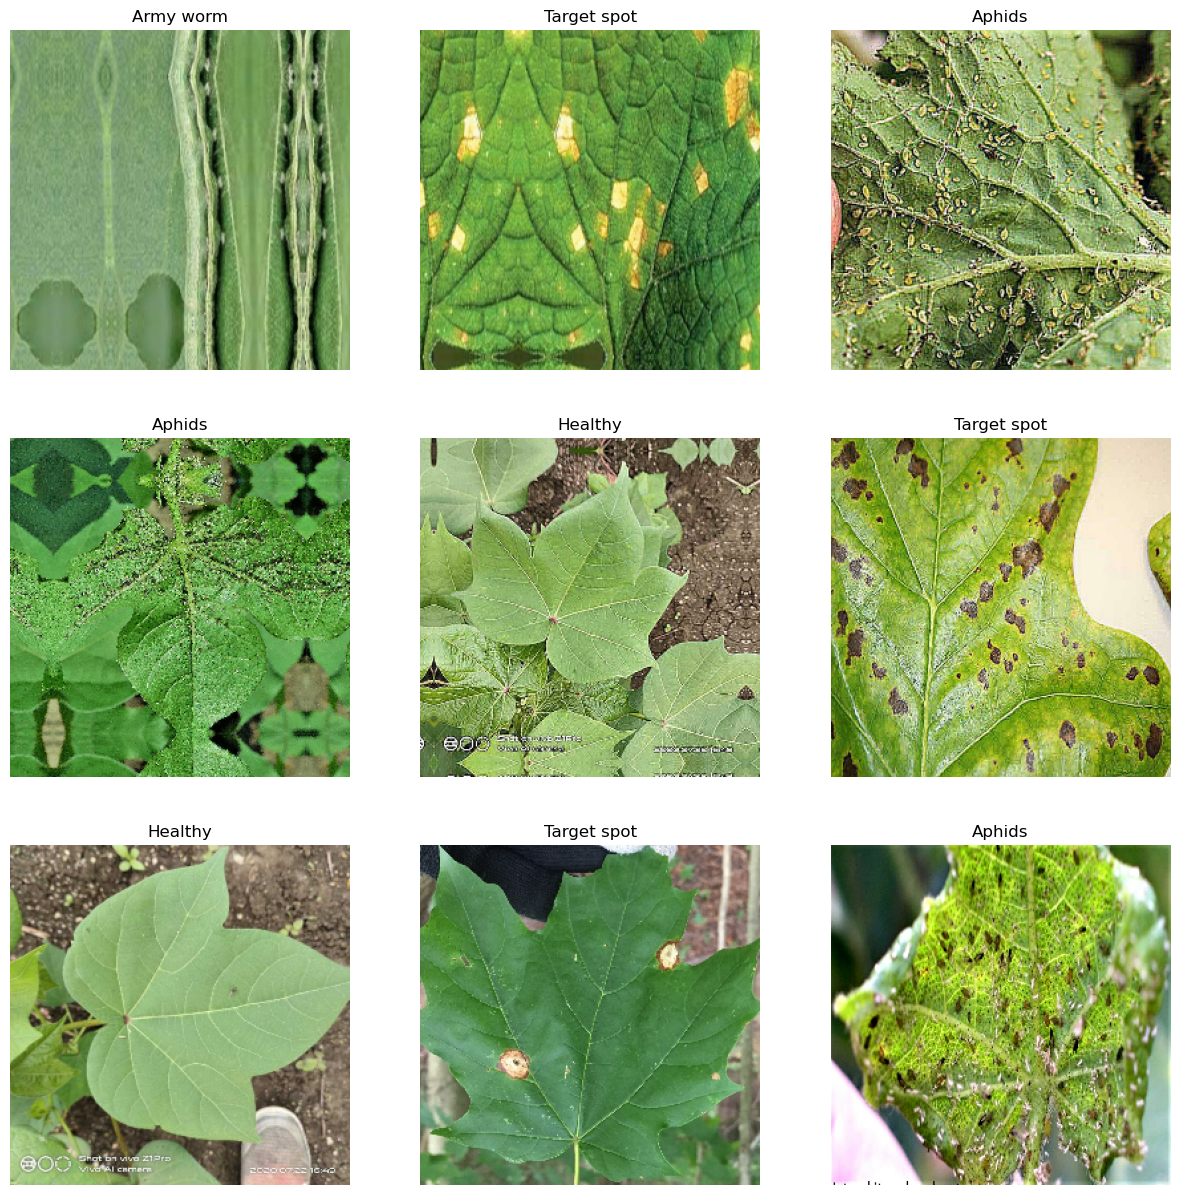

In [17]:
class_names = dataset.class_names
plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.callbacks import ReduceLROnPlateau
from keras import Model, layers
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, Input, Conv2D, MaxPooling2D, Flatten,MaxPooling3D

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16

In [20]:
vgg16_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(256,256,3))
for layers in vgg16_model.layers:
            layers.trainable=False
last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(128, activation = 'relu')(vgg_x)
vgg_x = Dense(6, activation = 'softmax')(vgg_x)
vgg16_final_model = Model(vgg16_model.input, vgg_x)
vgg16_final_model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

# VGG16
number_of_epochs = 10
history = vgg16_final_model.fit(train_dataset, epochs = number_of_epochs ,validation_data = test_dataset)


58889256/58889256 [==============================] - 27s 0us/step
Epoch 1/10
91/91 [==============================] - 1115s 12s/step - loss: 1.2842 - acc: 0.5751 - val_loss: 1.0808 - val_acc: 0.6500
Epoch 2/10
91/91 [==============================] - 1058s 12s/step - loss: 0.7825 - acc: 0.7758 - val_loss: 0.8210 - val_acc: 0.7139
Epoch 3/10
91/91 [==============================] - 942s 10s/step - loss: 0.5973 - acc: 0.8212 - val_loss: 0.7064 - val_acc: 0.7389
Epoch 4/10
91/91 [==============================] - 667s 7s/step - loss: 0.5093 - acc: 0.8393 - val_loss: 0.6494 - val_acc: 0.7528
Epoch 5/10
91/91 [==============================] - 672s 7s/step - loss: 0.4184 - acc: 0.8730 - val_loss: 0.5255 - val_acc: 0.8306
Epoch 6/10
91/91 [==============================] - 669s 7s/step - loss: 0.3672 - acc: 0.8924 - val_loss: 0.5830 - val_acc: 0.8139
Epoch 7/10
91/91 [==============================] - 666s 7s/step - loss: 0.3255 - acc: 0.9049 - val_loss: 0.4439 - val_acc: 0.8583
Epoch 8/10
9

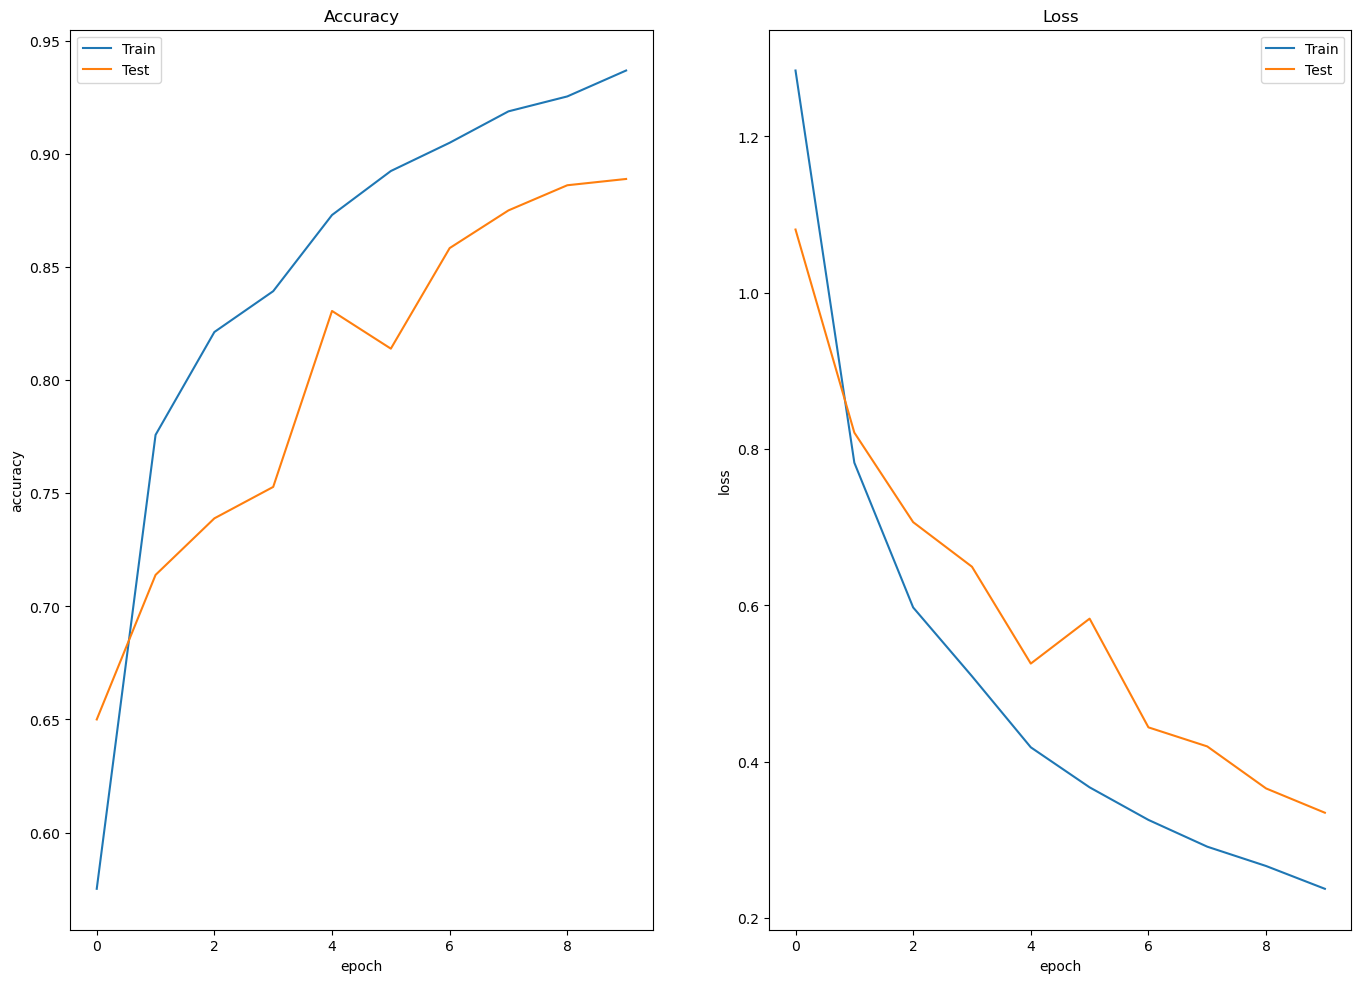

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16.53, 11.69))
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.set_title('Accuracy')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_title('Loss')
ax2.legend(['Train', 'Test'], loc="upper right")

In [98]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for i, (image_batch, label_batch) in enumerate(test_dataset):  
    # append true labels
    y_true.append(label_batch)
    # compute predictions
    preds = vgg16_final_model.predict(image_batch)
    # append predicted labels
    y_pred.append(np.argmax(preds, axis =  1))
    if i==300:
        break

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
correct_labels = np.argmax(correct_labels, axis=1)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)


1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 6s 6s/step


In [110]:
cm = confusion_matrix(correct_labels,predicted_labels)

In [25]:
vgg16_final_model.evaluate(test_dataset)

12/12 [==============================] - 63s 5s/step - loss: 0.3347 - acc: 0.8889


[0.33469218015670776, 0.8888888955116272]

In [29]:
vgg16_final_model.save("cotton.h5")

In [111]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',figsize=(10, 10),cmap=plt.cm.Blues):
    
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1173  125   74   50   26   50]
 [  75 1330    0  100    0    0]
 [  50    0 1376    0   75    0]
 [   0   25    0 1463    0   25]
 [ 124   76   26    0 1278    0]
 [   0    0   51   50    0 1410]]


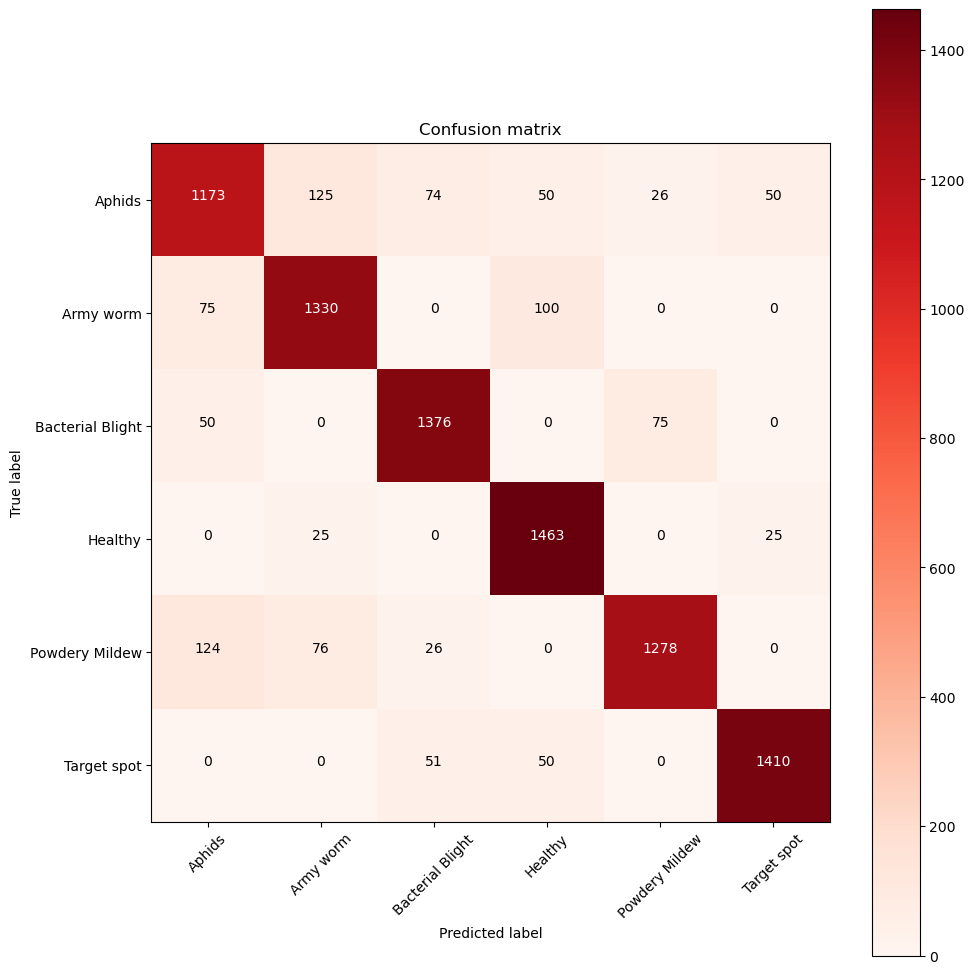

In [112]:
plot_confusion_matrix(cm, train_dataset.class_indices, cmap='Reds')

In [107]:
print(cm)

[]


1/1 [==============================] - 0s 186ms/step


Text(0.5, 1.0, 'Target spot')

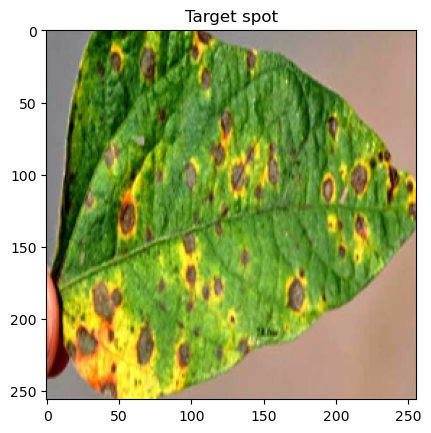

In [113]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)
  
  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("Main dataset/leaf1.jpg", 256)
image = image[:,:,:3]
pred = vgg16_final_model.predict(tf.expand_dims(image, axis=0))
plt.imshow(image)
plt.title(class_names[pred[0].argmax()])